In [ ]:
#import algebra linear and data manipulation
import numpy as np
import pandas as pd
from collections import defaultdict

#Plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#opening dataframes
df_review = pd.read_csv('./reviews.csv')
df_listings = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')

In [25]:
#==============================================================================
#Spliting dataframes into categories - Host, Review, quarto, bairro
#==============================================================================

host = df_listings[['host_is_superhost', 'host_response_rate', 'host_response_time']]

review = df_listings[['id','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

quarto = df_listings[['room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'accommodates','property_type']]

bairro = df_listings[['neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed']]


In [26]:
#==============================================================
#Data treatment - NaN Values and change object columns in floats
#==============================================================

#host
'''
print(host.dtypes)
print(host.isnull().sum()) #count NaN values
print(host['host_response_rate'].value_counts) #Identify value counts for each rate
'''

#transform the host_is_superhost in float
host['host_is_superhost'] = host['host_is_superhost'].map({'f':1,'t':0}) #change f and t for 1 and 0

#Transform the responde_rate column in str and flot to find the mean
host['host_response_rate_num'] = host['host_response_rate'].astype(str)
host['host_response_rate_num'] = host['host_response_rate_num'].str.replace("%", "").astype("float")
host['host_response_rate_num'].fillna(host['host_response_rate_num'].mean(), inplace = True)

#Change responde_time into float and fill with the mean
host['host_response_time'] = host['host_response_time'].map({'within a few hours':6,
                                                           'within an hour':1,
                                                           'within a day':24,
                                                           'a few days or more':48})

host['host_response_time'].fillna(host['host_response_time'].mean(), inplace = True)

host1= host.drop(['host_response_rate'], axis=1) #Drop the old responde_rate column
hostnew = host1.dropna() #drop all NaN values

<ipython-input-26-97a7d3424f0c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host['host_is_superhost'] = host['host_is_superhost'].map({'f':1,'t':0}) #change f and t for 1 and 0
<ipython-input-26-97a7d3424f0c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host['host_response_rate_num'] = host['host_response_rate'].astype(str)
<ipython-input-26-97a7d3424f0c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [27]:
#review
'''
print(review.dtypes)
print(review.isnull().sum()) #Contar nro de vazios por colunas
'''

#Fill all columns with the mean
review.groupby('id')['review_scores_value'].fillna(review['review_scores_value'].mean(), inplace = True)
review.groupby('id')['review_scores_rating'].fillna(review['review_scores_rating'].mean(), inplace = True)
review.groupby('id')['review_scores_accuracy'].fillna(review['review_scores_accuracy'].mean(), inplace = True)
review.groupby('id')['review_scores_cleanliness'].fillna(review['review_scores_cleanliness'].mean(), inplace = True)
review.groupby('id')['review_scores_checkin'].fillna(review['review_scores_checkin'].mean(), inplace = True)
review.groupby('id')['review_scores_communication'].fillna(review['review_scores_communication'].mean(), inplace = True)
review.groupby('id')['review_scores_location'].fillna(review['review_scores_location'].mean(), inplace = True)


id
3335        None
4291        None
5682        None
6606        None
7369        None
            ... 
10332096    None
10334184    None
10339144    None
10339145    None
10340165    None
Name: review_scores_location, Length: 3818, dtype: object

In [28]:
#quarto
print(quarto.isnull().sum()) #count null columns
quartonew=quarto.dropna() #drop null values

#bairro
print(quarto.isnull().sum()) #Contar nro de vazios por colunas
bairronew=bairro.dropna() ##drop null values, less than 10% - most of the ananysis here need neighbourhood information


room_type         0
bathrooms        16
bedrooms          6
beds              1
bed_type          0
accommodates      0
property_type     1
dtype: int64
room_type         0
bathrooms        16
bedrooms          6
beds              1
bed_type          0
accommodates      0
property_type     1
dtype: int64


In [29]:
#===============
#Data treatment
#==============

#creat new df
df_novo = pd.concat((review, quartonew, hostnew, bairronew), axis=1)

#split date information in year and month, drop the original date column
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format= '%Y/%m/%d') #set date in datetime
df_calendar['ano'] = df_calendar['date'].dt.year #create a year column
df_calendar['mês'] = df_calendar['date'].dt.month #create a month column
df_calendar.drop(['date'], axis=1, inplace=True) #drop the old date column

df_novo.rename(index=str, columns={'id': 'listing_id'}, inplace=True) #change the 'id' column name to be the same as the calendar

df = pd.merge(df_calendar, df_novo, on='listing_id') #merge calendar and the new dataframe

df.dropna(subset=['price'],inplace=True) #drop all listings with no price.

df['price'] = df['price'].str.replace("[$, ]", "").astype("float") #replacing $ by "" and converting price column into float

df.head()

,listing_id,available,price,ano,mês,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,beds,bed_type,accommodates,property_type,host_is_superhost,host_response_time,host_response_rate_num,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,t,85.0,2016,1,207,95.0,10.0,10.0,10.0,...,1.0,Real Bed,4.0,Apartment,1.0,6.0,96.0,Queen Anne,West Queen Anne,Queen Anne
1,241032,t,85.0,2016,1,207,95.0,10.0,10.0,10.0,...,1.0,Real Bed,4.0,Apartment,1.0,6.0,96.0,Queen Anne,West Queen Anne,Queen Anne
9,241032,t,85.0,2016,1,207,95.0,10.0,10.0,10.0,...,1.0,Real Bed,4.0,Apartment,1.0,6.0,96.0,Queen Anne,West Queen Anne,Queen Anne
10,241032,t,85.0,2016,1,207,95.0,10.0,10.0,10.0,...,1.0,Real Bed,4.0,Apartment,1.0,6.0,96.0,Queen Anne,West Queen Anne,Queen Anne
14,241032,t,85.0,2016,1,207,95.0,10.0,10.0,10.0,...,1.0,Real Bed,4.0,Apartment,1.0,6.0,96.0,Queen Anne,West Queen Anne,Queen Anne


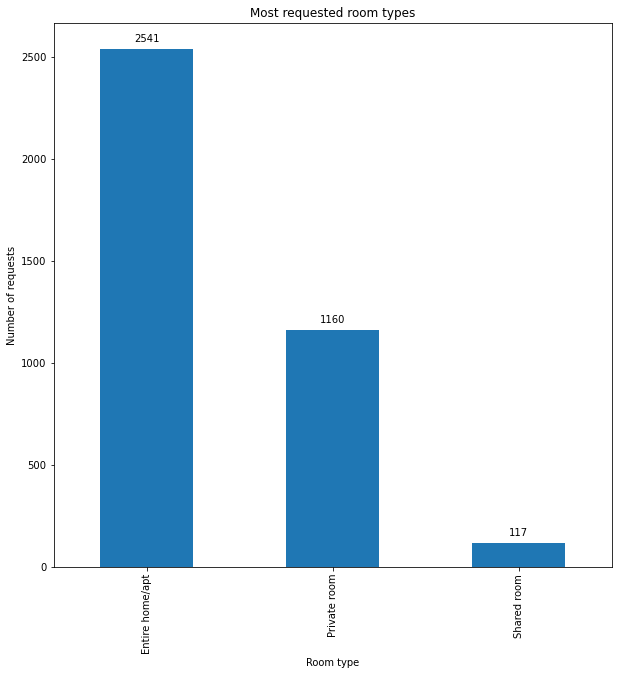

In [30]:
#======================================
#which are the most requested room types
#======================================

#Creating list with the room type counting (there are only 3 types)
room = [df_listings['room_type'].value_counts()[0],
        df_listings['room_type'].value_counts()[1],
        df_listings['room_type'].value_counts()[2]]
room_series = pd.Series(room)

#Unique room types
room_type = df_listings['room_type'].unique().tolist()
room_type_series = pd.Series(room_type)

#plot
plt.figure(figsize=(10,10))
ax = room_series.plot(kind='bar')
ax.set_title('Most requested room types')
ax.set_xlabel('Room type')
ax.set_ylabel('Number of requests')
ax.set_xticklabels(room_type)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('Most requested room type.png')

In [ ]:
def contagem_total(df, col1, col2, procura):

    '''
        INPUT:
            df - Dataframe that you are looking for
            col1 - column that you go through
            col2 - column with the values that you want
            procura - list containing the data you are looking for in each line of the df[col]

        OUTPUT:
            new_df - the new dataframe that has the unique counting

    '''

    new_df = defaultdict(int)
    
    #Loop in the list you want search for
    for val in procura:
        #Loop
        for x in range(df.shape[0]):
            #if found what you want, add 1
            if val in df[col1][x]:
                new_df[val] += int(df[col2][x])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    return new_df

In [32]:
amenities = ["TV","Internet","Wireless Internet","Cable TV","Air Conditioning","Kitchen",
             "Elevator in Building","Wheelchair Accessible","Smoke Detector","Free Parking on Premises","Pool",
             "Pets live on this property","Breakfast","Gym","Heating","Washer","Buzzer/Wireless Intercom","Smoking Allowed",
             "Carbon Monoxide Detector","Pets Allowed","Indoor Fireplace","Dryer","Dog(s)","Family/Kid Friendly","Hot Tub",
             "Cat(s)","Essentials","Shampoo","First Aid Kit","Doorman","Fire Extinguisher","Safety Card","Washer / Dryer",
             "Suitable for Events","Other pet(s)","Hangers","24-Hour Check-in","Laptop Friendly Workspace",
             "Lock on Bedroom Door","Hair Dryer","Iron"]

#Create new_df based on 'amenities' unique couting
df_amen = df_listings['amenities'].value_counts().reset_index()
df_amen.rename(columns={'index': 'Count'}, inplace=True)

new_df = contagem_total(df_amen,'Count','amenities',amenities)
new_df.set_index('Count',inplace=True)  

<AxesSubplot:xlabel='Count'>

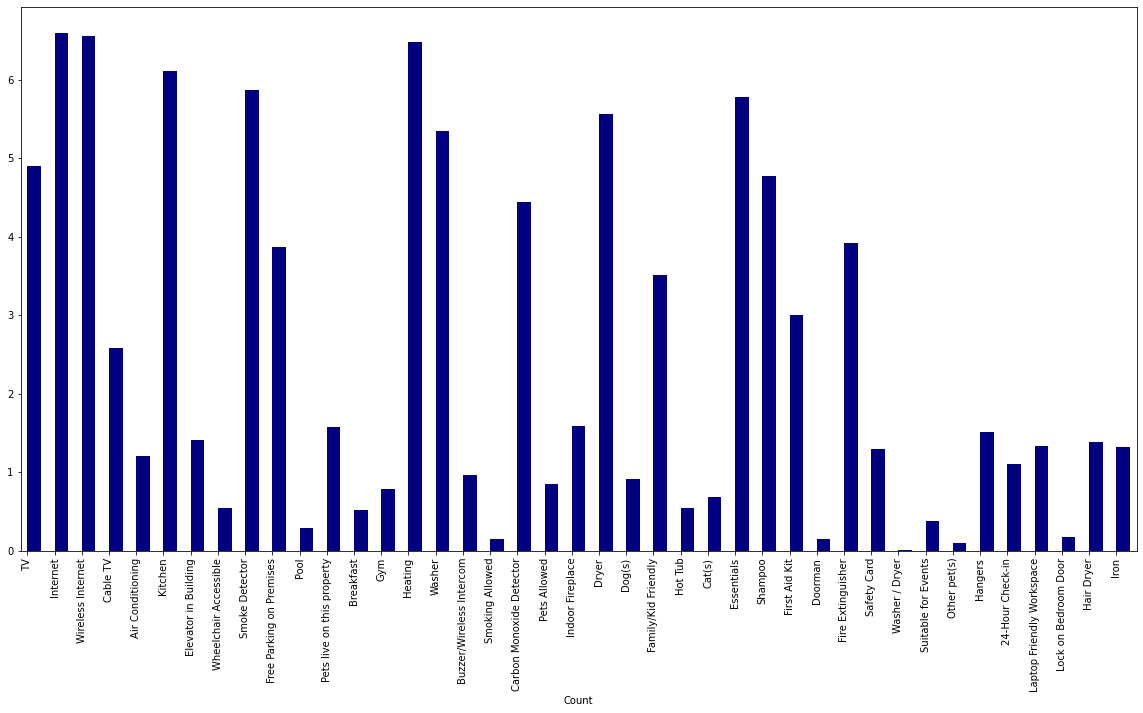

In [33]:
perc = (new_df/new_df.sum()*100)
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = .5

perc.plot(kind='bar',color='navy',width=width,ax=ax, position=0,legend=False)

In [34]:
#================================================
#Question - How does the price vary in Seattle?
#================================================

max_n_price = df['price'].max()
min_n_price = df['price'].min()
mean_n_price = df['price'].mean()

print('Highest Price: ',"$%.0f" % max_n_price)
print('Lowest Price: ',"$%.0f" % min_n_price)
print('Avg price: ',"$%.0f" % mean_n_price)

Highest Price:  $1650
Lowest Price:  $10
Avg price:  $138


'As we can see in the chart below, the avarage price vary between $ 60 to $ 200'

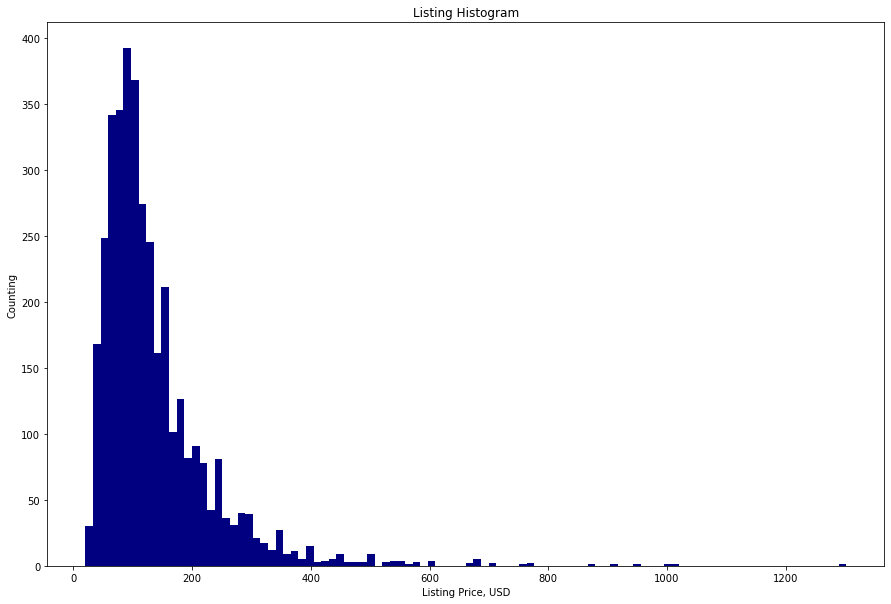

In [35]:
#========================================
#histogram of all listing with mean price
#========================================

df_hist=df.groupby('listing_id')['price'].mean()
plt.figure(figsize=(15,10))
plt.hist(df_hist,bins=100,color='navy')
plt.ylabel('Counting')
plt.xlabel('Listing Price, USD')
plt.title('Listing Histogram')
plt.savefig('Histograma de preços.png')

'''As we can see in the chart below, the avarage price vary between $ 60 to $ 200'''

Expensive neighbourhoods - Highest AVG Price:  $370
Expensive neighbourhoods - Lowest AVG Price:  $226
Avg price:  $264
Price Diff: $144


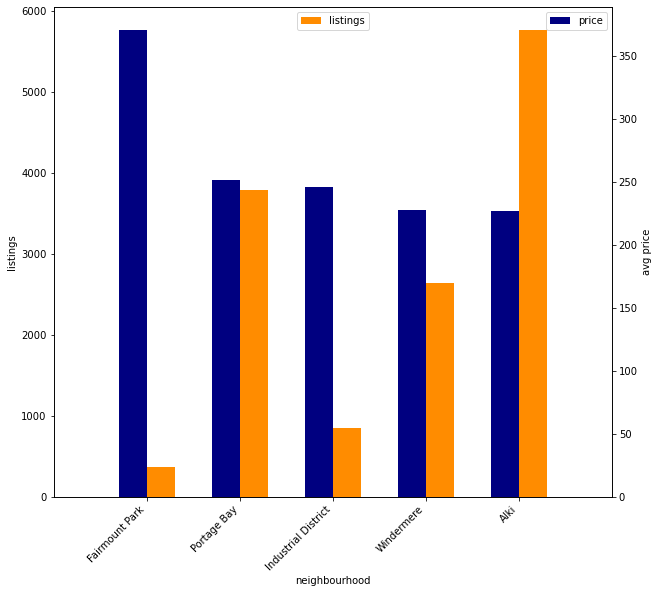

In [36]:
#==========================================================
#Question - which are the monst expensive neighbourhoods?
#==========================================================

preco_bairros = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index(name='price')

top5_bairros_caros_nome = preco_bairros['neighbourhood'][0:5].tolist()
top5_bairros_caros_preco = preco_bairros['price'][0:5].tolist()   
top5_bairros_caros_qtd = [df.loc[df.neighbourhood == preco_bairros['neighbourhood'][0]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][1]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][2]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][3]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][4]  , 'neighbourhood'].count()]
                         
df_top5 = pd.DataFrame(list(zip(top5_bairros_caros_nome,top5_bairros_caros_qtd,top5_bairros_caros_preco)),columns=['neighbourhood','listings','price'])


df_top5 = df_top5.set_index('neighbourhood')
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_top5.listings.plot(kind='bar',color='darkorange',ax=ax,width=width, position=0,legend=True)
df_top5.price.plot(kind='bar',color='navy', ax=ax2,width = width,position=1,legend=True)

ax.set_ylabel('listings')
ax2.set_ylabel('avg price')
ax.legend(loc='upper center')
fig.autofmt_xdate(rotation=45)

ax.set_xlim(-1,5)
fig.savefig('Top 5 - most expensive neighbourhoods - AVG price x Listing.png')

max_n_price = df_top5['price'].max()
min_n_price = df_top5['price'].min()
mean_n_price = df_top5['price'].mean()
price_diff = max_n_price - min_n_price

print('Expensive neighbourhoods - Highest AVG Price: ',"$%.0f" % max_n_price)
print('Expensive neighbourhoods - Lowest AVG Price: ',"$%.0f" % min_n_price)
print('Avg price: ',"$%.0f" % mean_n_price)
print('Price Diff: '"$%.0f" % price_diff)

Cheapest neighbourhoods - Highest AVG Price:  $78
Cheapest neighbourhoods - Lowest AVG Price:  $60
Avg price:  $72
Price Diff: $18


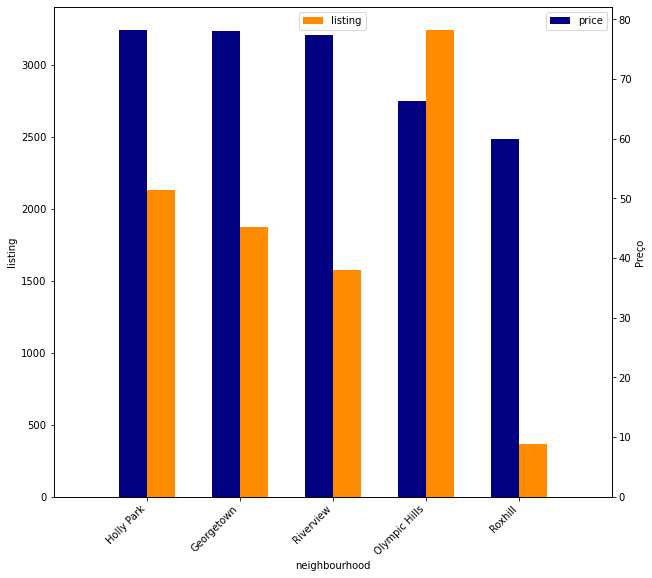

In [37]:
#======================================================
#Question - which are the most cheapest neighbourhoods?
#======================================================

preco_bairros = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index(name='price')

size = len(preco_bairros.index)

top5_bairros_caros_nome = preco_bairros['neighbourhood'][76:81].tolist()
top5_bairros_caros_preco = preco_bairros['price'][76:81].tolist()   
top5_bairros_caros_qtd = [df.loc[df.neighbourhood == preco_bairros['neighbourhood'][size-5]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][size-4]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][size-3]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][size-2]  , 'neighbourhood'].count(),
                          df.loc[df.neighbourhood == preco_bairros['neighbourhood'][size-1]  , 'neighbourhood'].count()]
                         
df_top5 = pd.DataFrame(list(zip(top5_bairros_caros_nome,top5_bairros_caros_qtd,top5_bairros_caros_preco)),columns=['neighbourhood','listing','price'])


df_top5 = df_top5.set_index('neighbourhood')
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_top5.listing.plot(kind='bar',color='darkorange',ax=ax,width=width, position=0,legend=True)
df_top5.price.plot(kind='bar',color='navy', ax=ax2,width = width,position=1,legend=True)

teste = ['listing','Preço']

ax.set_ylabel('listing')
ax2.set_ylabel('Preço')
ax.legend(loc='upper center')
fig.autofmt_xdate(rotation=45)

ax.set_xlim(-1,5)
fig.savefig('Top 5 - Bairros mais baratos - Preço x Disponibilidade.png')

max_n_price = df_top5['price'].max()
min_n_price = df_top5['price'].min()
mean_n_price = df_top5['price'].mean()
price_diff = max_n_price - min_n_price

print('Cheapest neighbourhoods - Highest AVG Price: ',"$%.0f" % max_n_price)
print('Cheapest neighbourhoods - Lowest AVG Price: ',"$%.0f" % min_n_price)
print('Avg price: ',"$%.0f" % mean_n_price)
print('Price Diff: '"$%.0f" % price_diff)

,guests,accommodates,percentage
0,2.0,401579.0,43.30
1,4.0,188464.0,20.32
2,3.0,88632.0,9.56
3,6.0,81943.0,8.84
4,1.0,68983.0,7.44


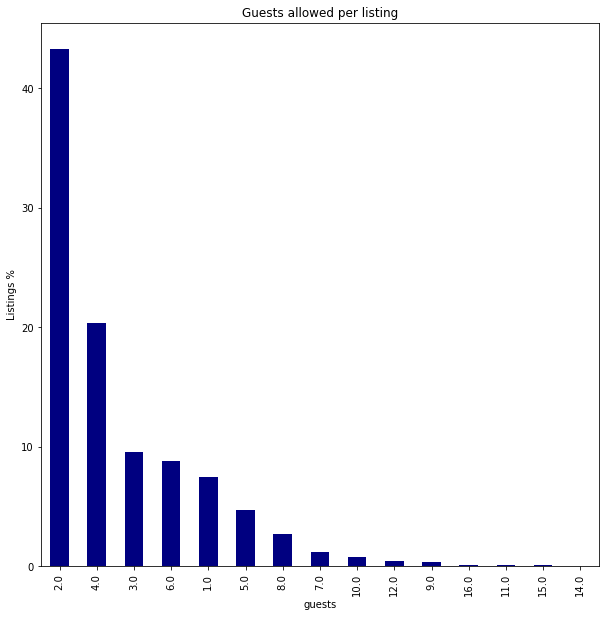

In [38]:
#===============================================
#How many guests are allowed in thoses listings?
#===============================================

df_acco = df['accommodates'].value_counts().reset_index().astype("float")
df_acco.rename(columns={'index': 'guests'}, inplace=True)
df_acco.set_index('guests')

def compute_percentage(x):
    pct = x/df_acco['accommodates'].sum()*100
    return round(pct, 2)

df_acco['percentage'] = df_acco['accommodates'].apply(compute_percentage)

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
plt.ylabel('Listings %')
plt.xlabel('Number of Guests allowed')
plt.title('Guests allowed per listing')
width = .5

df_acco.plot(kind='bar',x='guests',y='percentage',color='navy',width=width,ax=ax,legend=False)
plt.savefig('Accommodates per listing')
df_acco.head()

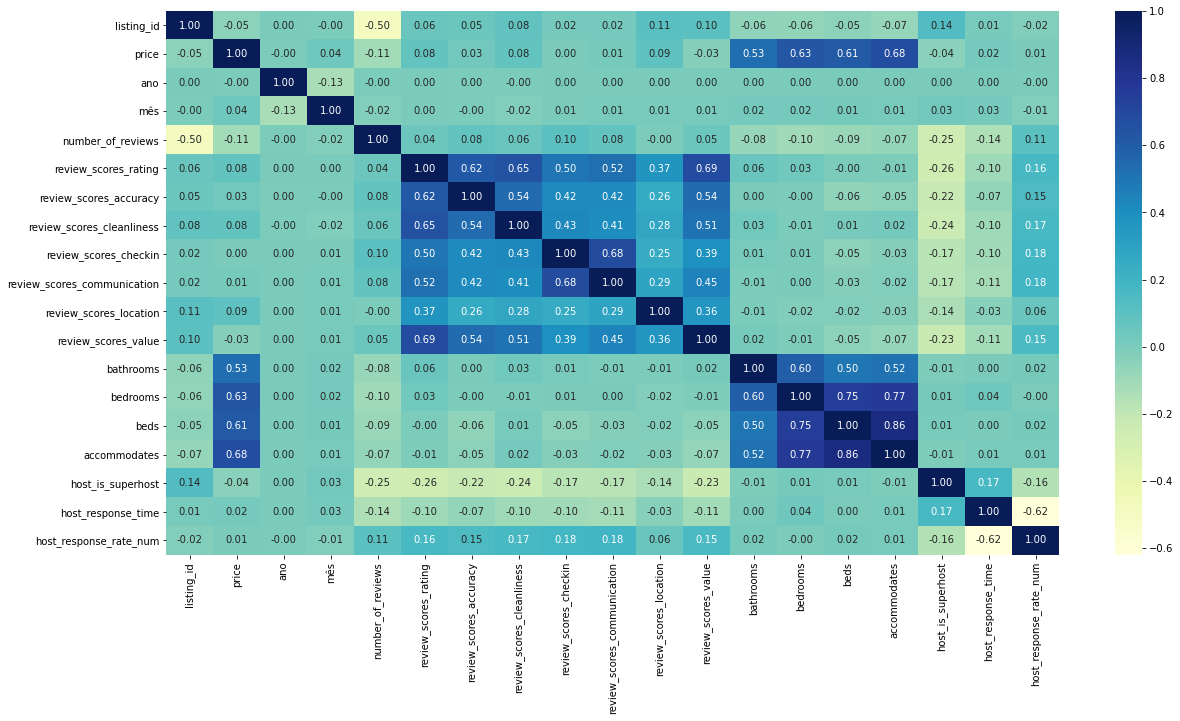

In [39]:
#heatmap
df_hc = df.select_dtypes(include=['float','int64']).copy()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_hc.corr(), annot=True, fmt='.2f',ax=ax, cmap="YlGnBu")
plt.savefig('Heatmap - Geral.png')

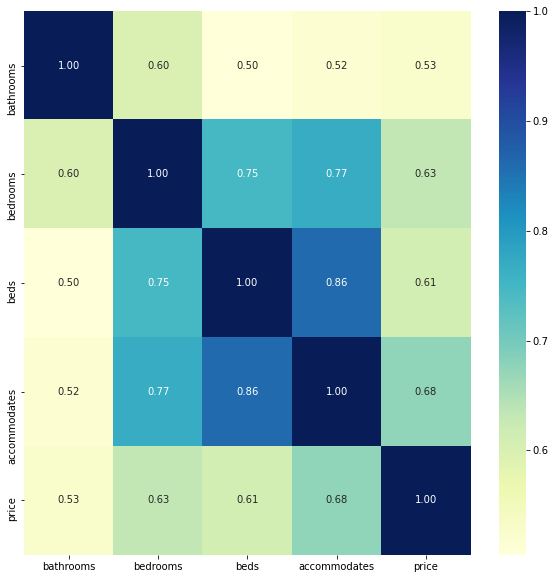

In [40]:
#Heatmap area
df2 = df.copy()
df_fisico = df2[['bathrooms', 'bedrooms', 'beds', 'accommodates','price']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_fisico.corr(), annot=True, fmt='.2f',ax=ax, cmap="YlGnBu")
plt.savefig('Heatmap - Space.png')

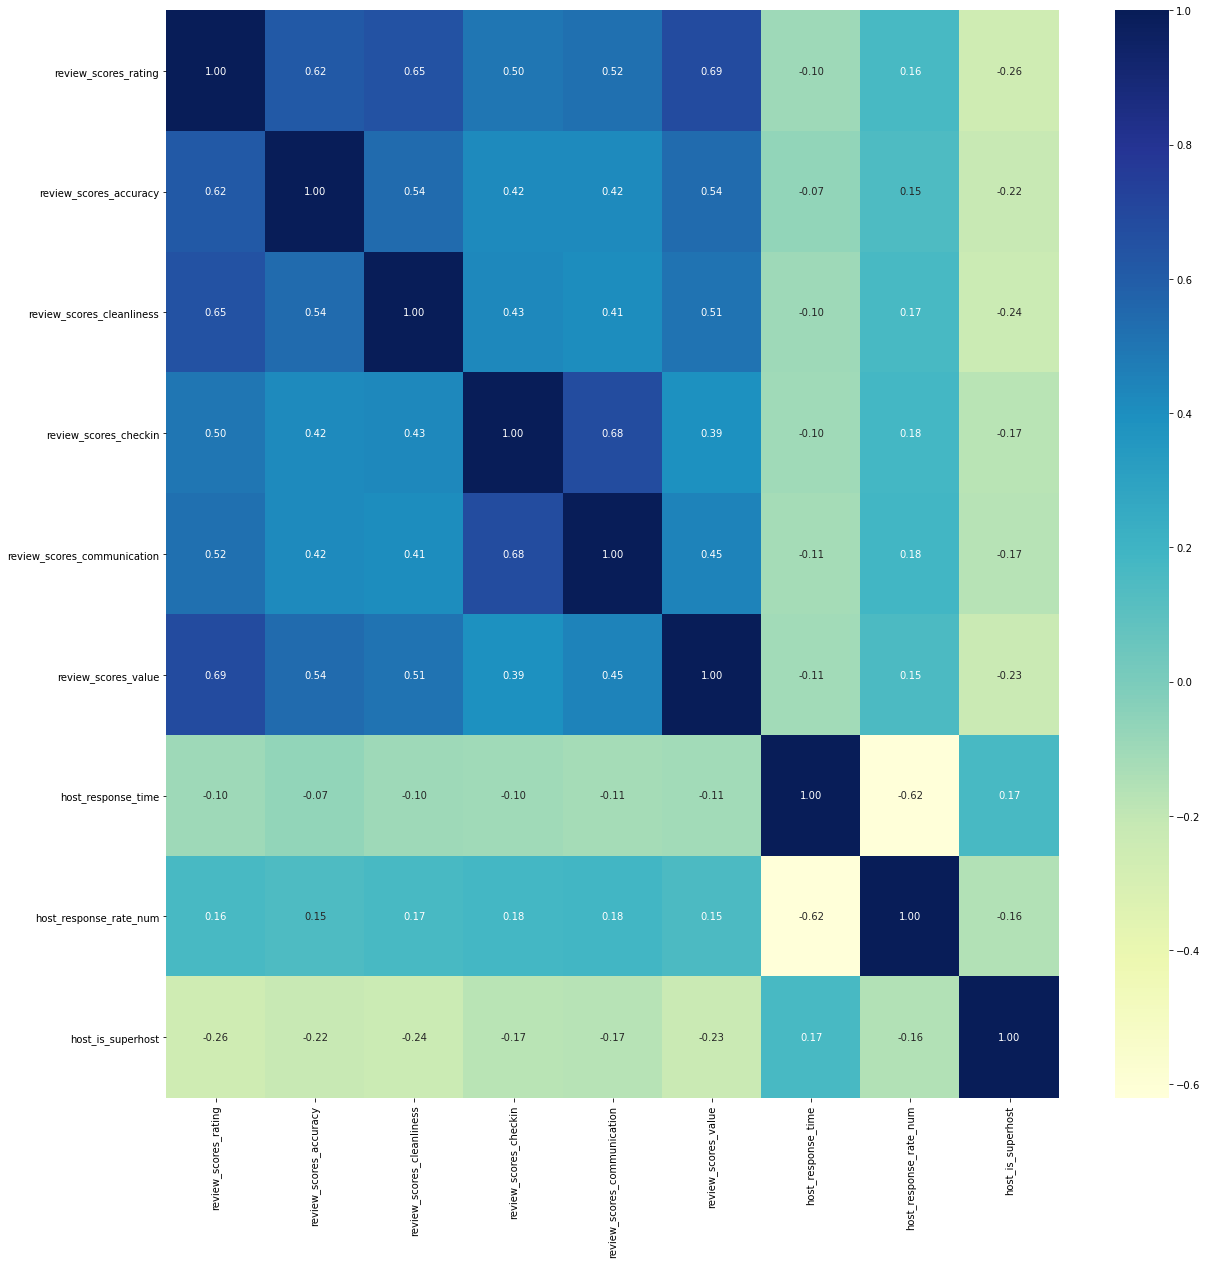

In [41]:
#Review and host heatmap
df_review = df2[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_value', 'host_response_time', 'host_response_rate_num' ,
                 'host_is_superhost']]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_review.corr(), annot=True, fmt='.2f',ax=ax, cmap="YlGnBu")
plt.savefig('Heatmap - Review.png')

In [42]:
#=====================
#linearization process
#=====================

#turn categorical columns into dummies

cat_col = list(df.select_dtypes(include=['object']).columns)

def create_dummy_df(df, cat_cols, dummy_na):

    for col in cat_cols:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
    return df

cat_df = create_dummy_df(df, cat_col, dummy_na=False)

#Processo de linearização

#1. Drop the rows with missing response values
cat_df = cat_df.dropna(subset=['price'])

#2. Drop columns with Nan for all the values

df = df.dropna()

#3 Apply dummy_df
df = create_dummy_df(df,cat_col,dummy_na=True)

#4 Split data into X matriz and response vector y
X = df.drop(['price'], axis=1)
y = df['price']

#5 Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("Training data R²: {:.4f}.  Test data R²: {:.4f}.".format(train_score, test_score))


Training data R²: 0.6651.  Test data R²: 0.6629.
